# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [258]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from skimage.filters import roberts, sobel, scharr,prewitt
from skimage import feature
from scipy.signal import convolve2d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- ### read the image

(-0.5, 271.5, 279.5, -0.5)

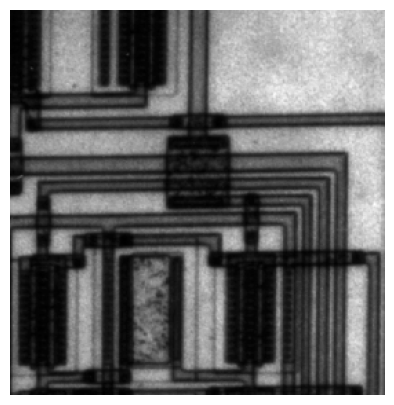

In [259]:
img = io.imread('circuit.tif',as_gray=False)
fig, ax = plt.subplots(ncols=1,figsize=(5,5))
ax.imshow(img,cmap=plt.cm.gray)
ax.axis('off')


- ### Built-in Sobel, Prewitt, Roberts, Canny

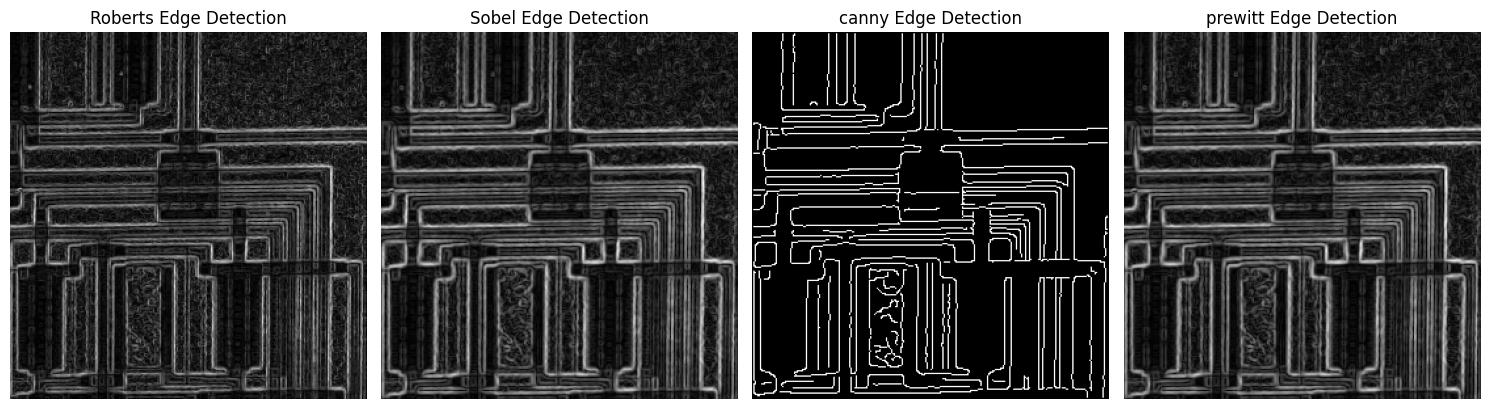

In [260]:
edge_roberts = roberts(img)
# it takes an additional optional mask which is a 2d array which limit the application to a certain area
edge_sobel = sobel(img)
edge_canny=feature.canny(img,sigma=1.5)
# sigma is the standard diviation of gaussian filter more sigma the more it will remove noise and affects our edges
edge_prewitt=prewitt(img)

fig, (ax0, ax1,ax2,ax3) = plt.subplots(ncols=4, figsize=(15, 15))

ax0.imshow(edge_roberts, cmap=plt.cm.gray)
ax0.set_title('Roberts Edge Detection')
ax0.axis('off')

ax1.imshow(edge_sobel, cmap=plt.cm.gray)
ax1.set_title('Sobel Edge Detection')
ax1.axis('off')

ax2.imshow(edge_canny, cmap=plt.cm.gray)
ax2.set_title('canny Edge Detection')
ax2.axis('off')

ax3.imshow(edge_prewitt, cmap=plt.cm.gray)
ax3.set_title('prewitt Edge Detection')
ax3.axis('off')

plt.tight_layout()

- ### Notes:
    - **Roberts Edge detector** is highly affected by the noise due to its small kernall
    - **Sobel Edge detector** is like prewitt but with additional weights at the middle (gives dervative ?)
    - **Prewitt Edge detector** is based on the central difference (same intensity gives zero different intensties gives a hight intensity edge depending on absolute difference between them ) 
    - **Canny Edge detector** is the best among last 3 filters it tries to satisfy all three:
        - smooth the image using gaussian filter
        - computes gradient magnitude and orientation
        - apply non-maxima suppression make it single response
        - apply double thresholding and hystersis
    - we can see that sigma plays a very important rule in canny edge detector as sigma increases noise is elleminated but it also affects our small edges.

- ### Custom Sobel (V-H-Both)


In [261]:
# 2. Custom Sobel (V-H-Both)
hx = np.array([
    [ -1, -2, -1],
    [ 0, 0, 0],
    [ 1, 2, 1]
])

hy = np.array([
    [ -1, 0, 1],
    [ -2, 0, 2],
    [ -1, 0, 1]
])
# getting edges
vertical_edges=convolve2d(img, hy)
horizontal_edges=convolve2d(img, hx)


# Compute G[x,y]
G=np.sqrt(np.square(vertical_edges)+np.square(horizontal_edges))


# normalize Gradiant result to be in between [0,1]
G_normalized=G/255

# taking more than 0.5
img_thresholded=G_normalized>0.5

(-0.5, 273.5, 281.5, -0.5)

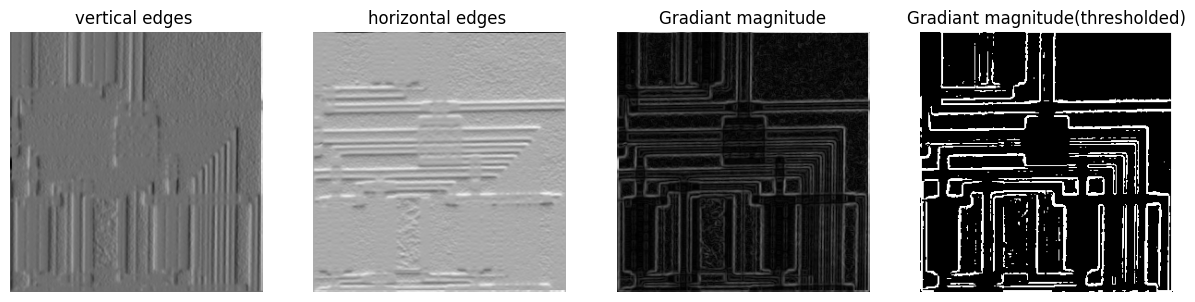

In [262]:
fig, (ax0, ax1,ax2,ax3)=plt.subplots(ncols=4, figsize=(15, 15))


#show output images from last cell block
ax0.imshow(vertical_edges, cmap=plt.cm.gray)
ax0.set_title('vertical edges ')
ax0.axis('off')

ax1.imshow(horizontal_edges, cmap=plt.cm.gray)
ax1.set_title('horizontal edges ')
ax1.axis('off')


ax2.imshow(G/255, cmap=plt.cm.gray)
ax2.set_title('Gradiant magnitude')
ax2.axis('off')

ax3.imshow(img_thresholded, cmap=plt.cm.gray)
ax3.set_title('Gradiant magnitude(thresholded)')
ax3.axis('off')

- ### Custom LoG

In [263]:
# 3. Custom LoG
thres= 20

# 1] apply gaussian filter:

gaussianFilter = (1.0/16.0)*np.array([
    [ 1.0, 2.0, 1.0],
    [ 2.0, 4.0, 2.0],
    [ 1.0, 2.0, 1.0]
])

imageFiltered= convolve2d(img, gaussianFilter)

# apply laplacian filter:
F1 = np.array([
    [ -1.0, -1.0, -1.0],
    [ -1.0, 8.0, -1.0],
    [ -1.0, -1.0, -1.0]
])

F2 = np.array([
    [ 0, 1.0, 0],
    [ 1.0, -4.0, 1.0],
    [ 0, 1.0, 0]
])

LOG_F1=convolve2d(imageFiltered, F1)
LOG_F2=convolve2d(imageFiltered, F2)

#thresholding
LOG_F1=LOG_F1>thres
LOG_F2=LOG_F2>thres

(-0.5, 275.5, 283.5, -0.5)

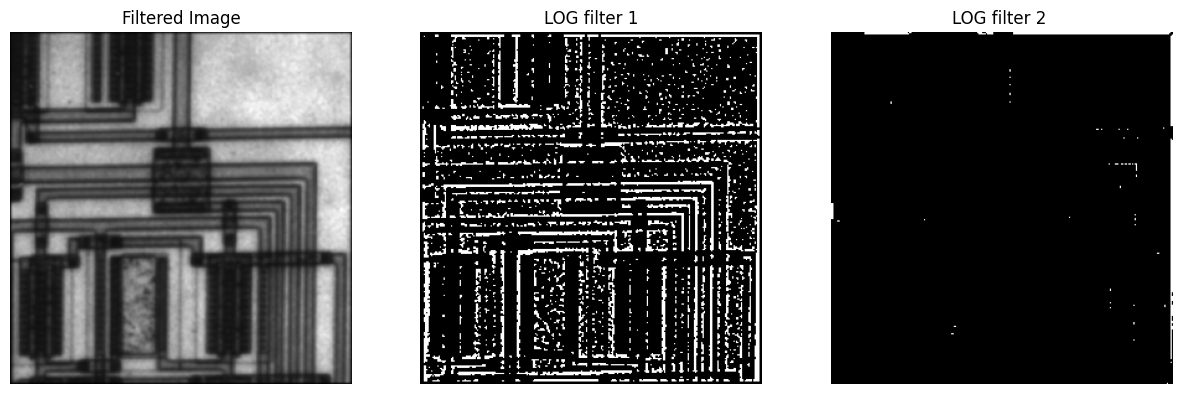

In [264]:
#show output images from last cell
fig, (ax0, ax1,ax2)=plt.subplots(ncols=3, figsize=(15, 15))

ax0.imshow(imageFiltered, cmap=plt.cm.gray)
ax0.set_title('Filtered Image')
ax0.axis('off')

ax1.imshow(LOG_F1, cmap=plt.cm.gray)
ax1.set_title('LOG filter 1')
ax1.axis('off')

ax2.imshow(LOG_F2, cmap=plt.cm.gray)
ax2.set_title('LOG filter 2 ')
ax2.axis('off')

In [265]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'